In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
#Loading the URL

col_name = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", names = col_name)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
# Now checking about Missing Data

df.isnull().head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
"""
temp = df["normalized-losses"].value_counts()
for val, count in enumerate (temp):
  print(count)
"""

df.values[0]

array([3, '?', 'alfa-romero', 'gas', 'std', 'two', 'convertible', 'rwd',
       'front', 88.6, 168.8, 64.1, 48.8, 2548, 'dohc', 'four', 130,
       'mpfi', '3.47', '2.68', 9.0, '111', '5000', 21, 27, '13495'],
      dtype=object)

In [ ]:
if "?" in df.values:
  print("? exists")

? exists


In [ ]:
# Which column contains "?"

df.isin(["?"]).any()

symboling            False
normalized-losses     True
make                 False
fuel-type            False
aspiration           False
num-of-doors          True
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                  True
stroke                True
compression-ratio    False
horsepower            True
peak-rpm              True
city-mpg             False
highway-mpg          False
price                 True
dtype: bool

In [ ]:

orig_df = df.copy()

In [ ]:
# Now, Replacing.... Before replaceing check the data types and motto is to replace by the average value

df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [ ]:
df.replace("?", np.nan, inplace = True)
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [ ]:
mean1 = df["normalized-losses"].astype("float").mean(axis = 0)
mean1

122.0

In [ ]:
missing_val = df.isnull()
for cols in df.columns.values:
  print(cols)
  print(missing_val[cols].value_counts())
  print(" ")

symboling
False    205
Name: symboling, dtype: int64
 
normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64
 
make
False    205
Name: make, dtype: int64
 
fuel-type
False    205
Name: fuel-type, dtype: int64
 
aspiration
False    205
Name: aspiration, dtype: int64
 
num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64
 
body-style
False    205
Name: body-style, dtype: int64
 
drive-wheels
False    205
Name: drive-wheels, dtype: int64
 
engine-location
False    205
Name: engine-location, dtype: int64
 
wheel-base
False    205
Name: wheel-base, dtype: int64
 
length
False    205
Name: length, dtype: int64
 
width
False    205
Name: width, dtype: int64
 
height
False    205
Name: height, dtype: int64
 
curb-weight
False    205
Name: curb-weight, dtype: int64
 
engine-type
False    205
Name: engine-type, dtype: int64
 
num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64
 
engine-size
False    205
Name: engine-size, dtype: int64

In [ ]:
len(df["normalized-losses"])

205

In [ ]:
# Replacing "?" with mean for Normalized-losses

df["normalized-losses"].replace(np.nan, mean1, inplace = True)

In [ ]:
df["normalized-losses"].head(2)

0    122
1    122
Name: normalized-losses, dtype: object

In [ ]:
df["normalized-losses"] = df["normalized-losses"].astype("float")
df["normalized-losses"].dtype

dtype('float64')

In [ ]:
# Converting all other required objects to float

df[["bore", "stroke", "horsepower", "peak-rpm", "price"]] = df[["bore", "stroke", "horsepower", "peak-rpm", "price"]].astype("float64")
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [ ]:
#replace the missing 'num-of-doors' values by the most frequent 

max_doors = df["num-of-doors"].value_counts().idxmax()

In [ ]:
df["num-of-doors"].replace(np.nan, max_doors, inplace = True)

In [ ]:
df["num-of-doors"].value_counts()

four    116
two      89
Name: num-of-doors, dtype: int64

In [ ]:
# dropping whole row with NaN in "price" column and resetting the index

df = df.dropna(subset=["price"], axis = 0).reset_index(drop=True)

In [ ]:
# Checking For Null Values

for i in df.columns.values:
  if(i=="price"):
    if np.nan in df[i].values:
      print("NaN exists")
    else:
      print("NaN Not Found")

NaN Not Found


In [ ]:
# Replacing Horsepower and peak-rpm with Mean

avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
avg_peakRPM = df['peak-rpm'].astype('float').mean(axis=0)

df["horsepower"].replace(np.nan, avg_horsepower, inplace = True)
df["peak-rpm"].replace(np.nan, avg_peakRPM, inplace = True)

In [ ]:
df.isin([np.nan]).any()

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                  True
stroke                True
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

In [ ]:
# So, Have to change it for Bore and Stroke

avg_bore = df['bore'].astype('float').mean(axis=0)
avg_stroke = df['stroke'].astype('float').mean(axis=0)

df["bore"].replace(np.nan, avg_bore, inplace = True)
df["stroke"].replace(np.nan, avg_stroke, inplace = True)

In [ ]:
for i in df.columns.values:
  if(i=="bore" and "stroke"):
    if np.nan in df[i].values:
      print("NaN exists")
    else:
      print("NaN Not Found")

NaN Not Found


In [ ]:
df.isin([np.nan]).any().value_counts()

False    26
dtype: int64

### *So, no missing values*

## Let's proceed with Data Standardization

In [ ]:
# Transform mpg to L/100km

df["city-mpg"] = 235 / df["city-mpg"]
df["highway-mpg"] = 235 / df["highway-mpg"]

df.rename(columns = {"city-mpg" : "city-L/100km", "highway-mpg" : "highway-L/100km"}, inplace = True)
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,16500.0


## Data Normalization

In [ ]:
def maxNorm(col_name):
  df[col_name] = df[col_name] / df[col_name].max()
  return df[col_name]

In [ ]:
df[["length", "width", "height"]].head(2)

,length,width,height
0,168.8,64.1,48.8
1,168.8,64.1,48.8


In [ ]:
df["length"] = maxNorm("length")
df["width"] = maxNorm("width")
df["height"] = maxNorm("height")

df[["length", "width", "height"]].head(2)

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054


## Binning

Text(0.5, 1.0, 'Horsepower Bin')

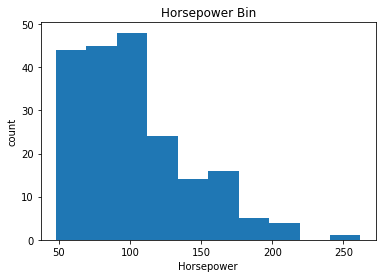

In [ ]:
%matplotlib inline

plt.hist(df["horsepower"])

plt.xlabel("Horsepower")
plt.ylabel("count")
plt.title("Horsepower Bin")

In [ ]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
group_names = ["Low", "Medium", "High"]

df["horsepower-binned"] = pd.cut(df["horsepower"], bins, labels = group_names, include_lowest = True)
df["horsepower-binned"].head()

0       Low
1       Low
2    Medium
3       Low
4       Low
Name: horsepower-binned, dtype: category
Categories (3, object): [Low < Medium < High]

In [ ]:
print(df["horsepower-binned"].value_counts())
df[["horsepower","horsepower-binned"]].head()


Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64


,horsepower,horsepower-binned
0,111.0,Low
1,111.0,Low
2,154.0,Medium
3,102.0,Low
4,115.0,Low


Text(0.5, 1.0, 'Horsepower Bin')

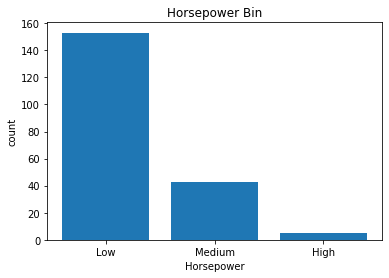

In [ ]:
%matplotlib inline

matplotlib.pyplot.bar(group_names, df["horsepower-binned"].value_counts())

plt.xlabel("Horsepower")
plt.ylabel("count")
plt.title("Horsepower Bin")

Text(0.5, 1.0, 'Horsepower Bin')

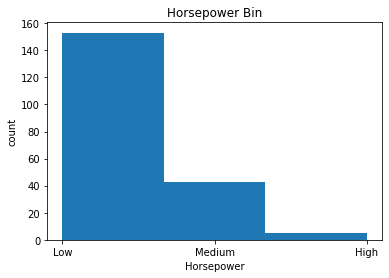

In [ ]:
%matplotlib inline

plt.hist(df["horsepower-binned"], bins = 3)

plt.xlabel("Horsepower")
plt.ylabel("count")
plt.title("Horsepower Bin")

Text(0.5, 1.0, 'Horsepower Bin')

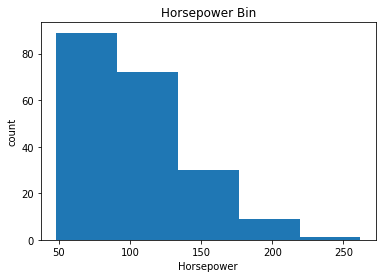

In [ ]:
%matplotlib inline

plt.hist(df["horsepower"], bins = 5)

plt.xlabel("Horsepower")
plt.ylabel("count")
plt.title("Horsepower Bin")

## My NOTE - User Defined Bins for a particular range

In [ ]:
df["horsepower"].min()

48.0

In [ ]:
binss = []
vals = []

for val in df["horsepower"].values:
  if val<=60:
    vals.append(val)
    binss.append("Low") 

  elif val<=80:
    vals.append(val)
    binss.append("Med")

  elif val<=100:
    vals.append(val)
    binss.append("High")

  else:
    vals.append(val)
    binss.append("Very-High")

df_binned = pd.DataFrame(list(zip(vals, binss)), columns = ["Horsepw", "Bins"])

df_binned.head(20)

,Horsepw,Bins
0,111.0,Very-High
1,111.0,Very-High
2,154.0,Very-High
3,102.0,Very-High
4,115.0,Very-High
5,110.0,Very-High
6,110.0,Very-High
7,110.0,Very-High
8,140.0,Very-High
9,101.0,Very-High


In [ ]:
df_binned["Bins"].value_counts()

Very-High    92
Med          55
High         46
Low           8
Name: Bins, dtype: int64

## Indicator / Dummy Variable

In [ ]:
dummy_var_1 = pd.get_dummies(df["fuel-type"])
dummy_var_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
# print("My name is {}".format(123))

for i, j in enumerate(["asp", "bnr", "pqr"]):
  print("My name is {}_{}".format(i, j))

My name is 0_asp
My name is 1_bnr
My name is 2_pqr


In [ ]:
dummy_var_1.rename(columns={'gas':'fuel-type-diesel', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_var_1.head()

,fuel-type-diesel,fuel-type-diesel
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
df = pd.concat([df, dummy_var_1], axis = 1)
df.drop("fuel-type", axis = 1, inplace = True)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fuel-type-diesel
0,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,13495.0,Low,0,1
1,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,16500.0,Low,0,1
2,1,122.0,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,12.368421,9.038462,16500.0,Medium,0,1
3,2,164.0,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,9.791667,7.833333,13950.0,Low,0,1
4,2,164.0,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,13.055556,10.681818,17450.0,Low,0,1


In [ ]:
df_temp = df.copy()

In [ ]:
df_temp.columns.values[0]

'symboling'

### Funct Work in progress

In [ ]:
def DummyVarConcat(col_name):
  dummy_var = pd.get_dummies(df_temp[col_name])
  col1 = df_temp.columns.values[0]
  col2 = df_temp.columns.values[1]

  dummy_var.rename(columns={col1:'{}-{}'.format(col_name, col1), col2:'{}-{}'.format(col_name, col2)}, inplace=True)
  df_temp = pd.concat([df_temp, dummy_var], axis = 1)
  df_temp.drop("{}".format(col_name), axis = 1, inplace = True)

  return df_temp

In [ ]:
# pd.get_dummies(df_temp["aspiration"])

def DummyVarConcat(col_name):
  dummy_var = pd.get_dummies(df_temp[col_name])
  return dummy_var
  # col1 = df_temp.columns.values[0]
  # col2 = df_temp.columns.values[1]
  # dummy_var.rename(columns={col1:'{}-{}'.format(col_name, col1), col2:'{}-{}'.format(col_name, col2)}, inplace=True)
  # df_temp = pd.concat([df_temp, dummy_var], axis = 1)
  # df_temp.drop("{}".format(col_name), axis = 1, inplace = True)
  # return df_temp

DummyVarConcat("aspiration").head()

UnboundLocalError: ignored

In [ ]:
DummyVarConcat("aspiration").head()
df_temp.head(2)

UnboundLocalError: ignored

In [ ]:
dummy_var_2 = pd.get_dummies(df["aspiration"])
dummy_var_2.rename(columns={"std":"aspiration-std", "turbo":"aspiration-turbo"}, inplace=True)
dummy_var_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
df=pd.concat([df, dummy_var_2], axis=1)
df.drop("aspiration", axis=1, inplace=True)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fuel-type-diesel,aspiration-std,aspiration-turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,13495.0,Low,0,1,1,0
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,16500.0,Low,0,1,1,0
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,12.368421,9.038462,16500.0,Medium,0,1,1,0
3,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,9.791667,7.833333,13950.0,Low,0,1,1,0
4,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,13.055556,10.681818,17450.0,Low,0,1,1,0


In [ ]:
df.to_csv('pre_processed.csv')

# PART 2 - Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("pre_processed.csv")
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fuel-type-diesel.1,aspiration-std,aspiration-turbo
0,0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,13495.0,Low,0,1,1,0
1,1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,16500.0,Low,0,1,1,0
2,2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,12.368421,9.038462,16500.0,Medium,0,1,1,0
3,3,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,9.791667,7.833333,13950.0,Low,0,1,1,0
4,4,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,13.055556,10.681818,17450.0,Low,0,1,1,0


In [ ]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [ ]:
df.head(2)

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fuel-type-diesel.1,aspiration-std,aspiration-turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,13495.0,Low,0,1,1,0
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,16500.0,Low,0,1,1,0


### Let's check "Correlation"

In [ ]:
df.corr().head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,fuel-type-diesel,fuel-type-diesel.1,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.007992,-0.182196,0.075790,0.279719,0.066171,-0.029807,-0.082391,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,0.055127,-0.114713,0.217300,0.239544,0.238567,0.181189,0.133999,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,0.250313,0.371250,-0.360233,0.476153,0.577576,0.584642,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,0.159733,0.579731,-0.286035,0.657373,0.707108,0.690628,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,0.189867,0.615006,-0.245852,0.673363,0.736728,0.751265,0.244356,-0.244356,-0.305732,0.305732


In [ ]:
df[["bore", "stroke", "horsepower"]].corr()

,bore,stroke,horsepower
bore,1.000000,-0.055390,0.566838
stroke,-0.055390,1.000000,0.097815
horsepower,0.566838,0.097815,1.000000


### Let's plot some Regression Plot

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


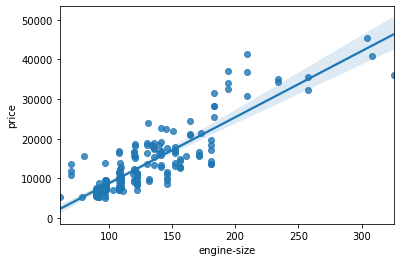

In [ ]:
# POSITIVE Correlation

sns.regplot(x = "engine-size", y = "price", data = df)
df[["engine-size", "price"]].corr()

,highway-L/100km,price
highway-L/100km,1.000000,0.801118
price,0.801118,1.000000


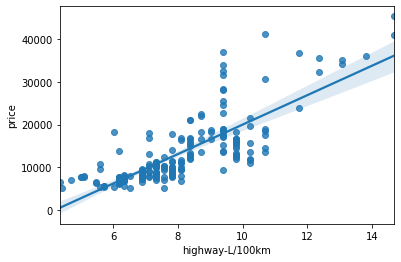

In [ ]:

sns.regplot(x = "highway-L/100km", y = "price", data = df)
df[["highway-L/100km", "price"]].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101542
price,-0.101542,1.000000


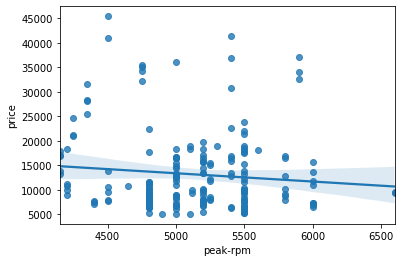

In [ ]:
sns.regplot(x="peak-rpm", y="price", data=df)
df[["peak-rpm", "price"]].corr()

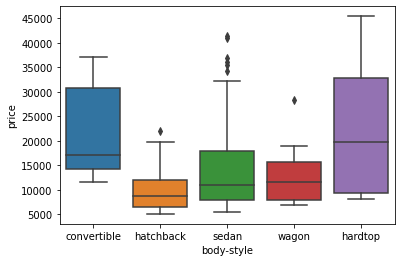

In [ ]:
# Plotting Box Plot

sns.boxplot(x="body-style", y="price", data=df)

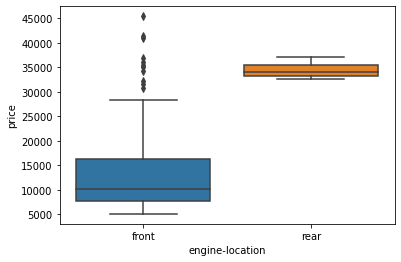

In [ ]:
# Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take 
# engine-location as a potential good predictor of price.

sns.boxplot(x="engine-location", y="price", data=df)


In [ ]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,fuel-type-diesel,fuel-type-diesel.1,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,9.944145,8.044957,13207.129353,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365602,478.113178,2.534599,1.840739,7947.066342,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,4.795918,4.351852,5118.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,7.833333,6.911765,7775.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5117.587940,9.791667,7.833333,10295.000000,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,12.368421,9.400000,16500.000000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,18.076923,14.687500,45400.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.describe(include = object)

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,115,94,118,198,145,157,92,153


In [ ]:
drive_wheels_count = df["drive-wheels"].value_counts().to_frame()
drive_wheels_count

,drive-wheels
fwd,118
rwd,75
4wd,8


In [ ]:
drive_wheels_count.rename(columns = {"drive-wheels" : "value_count"}, inplace = True)
drive_wheels_count.index.name = "drive-wheels"
drive_wheels_count

,value_count
drive-wheels,
fwd,118
rwd,75
4wd,8


### *Grouping*

In [ ]:
df["drive-wheels"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [ ]:
df_grp1 = df[["drive-wheels", "body-style", "price"]]
df_grp2 = df_grp1.groupby(["drive-wheels"], as_index = False).mean()
df_grp2.head()

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [ ]:
grouped_test1 = df_grp1.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [ ]:
grouped_pivot = grouped_test1.pivot(index = "drive-wheels", columns = "body-style")
grouped_pivot

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  NaN           NaN  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

In [ ]:
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  0.0      0.000000  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

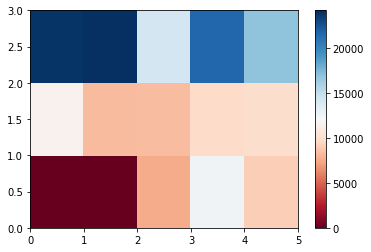

In [ ]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

In [ ]:
grouped_pivot.columns.levels

FrozenList([['price'], ['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon']])

In [ ]:
grouped_pivot.index

Index(['4wd', 'fwd', 'rwd'], dtype='object', name='drive-wheels')

In [ ]:
grouped_pivot.shape

(3, 5)

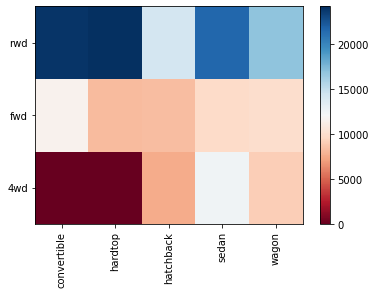

In [ ]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

### Pearson Coefficient

In [ ]:
from scipy import stats

In [ ]:
df[["wheel-base", "price"]].corr()

,wheel-base,price
wheel-base,1.000000,0.584642
price,0.584642,1.000000


In [ ]:
pearson_coef, p_val = stats.pearsonr(df["wheel-base"], df["price"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_val)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


## Correlation Functions Defined

In [ ]:
# Functions Defined

def Corr_Coef(col1, WRToCol):
  Pearson_coef, P_val = stats.pearsonr(df[col1], df[WRToCol])
  # print("The Pearson Correlation Coefficient is", Pearson_coef, " with a P-value of P =", P_val, " for ", col1, " Vs. ", WRToCol)  
  return Pearson_coef, P_val


In [ ]:
print(df["price"].dtype)
df["make"].dtype == "O"

float64


True

In [ ]:
temp = df["make"].dtype
if temp == "O":
  print("1")

1


In [ ]:
# Functions calling

wrto_col = "price"
for col in df.columns.values.tolist():
  if ((df[col].dtype) != "O"):
  # print(df[col].dtype)
    Pearson_coef, P_val = Corr_Coef(col, wrto_col)
    print("The Pearson Correlation Coefficient is", Pearson_coef, " with a P-value of P =", P_val, " for ", col, " Vs. ", wrto_col)  



The Pearson Correlation Coefficient is -0.08239118716962357  with a P-value of P = 0.2449148765716521  for  symboling  Vs.  price
The Pearson Correlation Coefficient is 0.13399873429274337  with a P-value of P = 0.05789749352703121  for  normalized-losses  Vs.  price
The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20  for  wheel-base  Vs.  price
The Pearson Correlation Coefficient is 0.6906283804483638  with a P-value of P = 8.016477466159556e-30  for  length  Vs.  price
The Pearson Correlation Coefficient is 0.7512653440522673  with a P-value of P = 9.200335510481646e-38  for  width  Vs.  price
The Pearson Correlation Coefficient is 0.13548630756805996  with a P-value of P = 0.05514627325101262  for  height  Vs.  price
The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P = 2.189577238894065e-53  for  curb-weight  Vs.  price
The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265

In [ ]:
# Now Lemme set a Threshold

pearson_thres = 0.7
PVal_thres = 5e-20

wrto_col = "price"
for col in df.columns.values.tolist():
  if ((df[col].dtype) != "O"):
    Pearson_coef, P_val = Corr_Coef(col, wrto_col)
    if (abs(Pearson_coef) > pearson_thres and abs(P_val) < PVal_thres):
          print("For Highly correlated Columns:- The Pearson Correlation Coefficient is", Pearson_coef, " with a P-value of P =", P_val, " for ", col, " Vs. ", wrto_col)  


For Highly correlated Columns:- The Pearson Correlation Coefficient is 0.7512653440522673  with a P-value of P = 9.200335510481646e-38  for  width  Vs.  price
For Highly correlated Columns:- The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P = 2.189577238894065e-53  for  curb-weight  Vs.  price
For Highly correlated Columns:- The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64  for  engine-size  Vs.  price
For Highly correlated Columns:- The Pearson Correlation Coefficient is 0.8096811975632288  with a P-value of P = 6.058444649710002e-48  for  horsepower  Vs.  price
For Highly correlated Columns:- The Pearson Correlation Coefficient is 0.7898975136626943  with a P-value of P = 3.903106400939802e-44  for  city-L/100km  Vs.  price
For Highly correlated Columns:- The Pearson Correlation Coefficient is 0.8011176263981974  with a P-value of P = 3.046784581041456e-46  for  highway-L/100km  Vs.  price
For Highly c

## *ANOVA*

In [ ]:
grouped_test2 = df_grp1[["drive-wheels", "price"]].groupby(["drive-wheels"])
grouped_test2.head()

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
6,fwd,17710.0
7,fwd,18920.0
8,fwd,23875.0
9,rwd,16430.0


In [ ]:
grouped_test2.get_group("4wd")["price"]

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group("4wd")["price"], grouped_test2.get_group("fwd")["price"], grouped_test2.get_group("rwd")["price"])
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


In [ ]:
grp_test_df = df.copy()

In [ ]:
a = ["tyy", "utp", "oui", "aab"]
a[-1], a[3]

('aab', 'aab')

In [ ]:
# INPROGRESS - Simplifying whole process


def ANOVA(from_impact, from_impact_vals, to_impact):
  grpd_test3 = grp_test_df[[from_impact, to_impact]].groupby([from_impact])
  # get_List = ""
  get_List = []
  for i in range(len(from_impact_vals)):
    param1 = grpd_test3.get_group(from_impact_vals[i])[to_impact]
    if(from_impact_vals[i] == from_impact_vals[-1]):
      param2 = np.asarray(param1)
      param3 = np.concatenate(param2, ",")
    #  get_List = get_List + param1
    # else:
      # get_List = get_List + param1 + ","
      
    
    else:
      param2 = np.asarray(param1)
      param3 = np.concatenate(param2)

  f_val2, p_val2 = stats.f_oneway(get_List)
  print( "ANOVA results: F=", f_val2, ", P =", p_val2)   


In [ ]:
def ANOVA(from_impact, from_impact_vals, to_impact):
  grpd_test3 = grp_test_df[[from_impact, to_impact]].groupby([from_impact])
  get_List = []
  for i in range(len(from_impact_vals)):
    param1 = grpd_test3.get_group(from_impact_vals[i])[to_impact]
    # param2 = np.asarray(param1)
    # get_List.append(param2)
    # print(param2)
    f_val2, p_val2 = stats.f_oneway(param1)  
  # print(get_List[0])
    print(f_val2, p_val2)

In [ ]:
wanna_chk = ["4wd", "fwd", "rwd"]
ANOVA("drive-wheels", "fwd", "price")

KeyError: ignored

## Woking ANOVA function

In [ ]:
def ANOVA_mini(from_impact, from_impact_val1, from_impact_val2, to_impact):
  grpd_test3 = grp_test_df[[from_impact, to_impact]].groupby([from_impact])
  f_val3, p_val3 = stats.f_oneway(grpd_test3.get_group(from_impact_val1)[to_impact], grpd_test3.get_group(from_impact_val2)[to_impact])
  print( "ANOVA results: F=", f_val3, ", P =", p_val3)   

In [ ]:
# Checking ANOVA separately

ANOVA_mini("drive-wheels", "fwd", "4wd", "price")
ANOVA_mini("drive-wheels", "fwd", "rwd", "price")
ANOVA_mini("drive-wheels", "rwd", "4wd", "price")

ANOVA results: F= 0.6654657502523033 , P = 0.41620116697845666
ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23
ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


### **Implementation of One hot (In Prog.)**

In [ ]:
import pandas as pd

dict1 = ["car1", "car2", "car3", "car4", "car5"]
dict2 = ["Tesla", "Volvo", "Lambo", "Lambo", "Tesla"]

df_dict = pd.DataFrame(zip(dict1, dict2) , columns = ["carList", "carName"])

df_dict.head()

,carList,carName
0,car1,Tesla
1,car2,Volvo
2,car3,Lambo
3,car4,Lambo
4,car5,Tesla


In [ ]:
# for i in df_dict.columns:
#   col = i
#   val = df_dict[col].values
for j, k in enumerate(df_dict["carName"].unique()):
    print(j, k)

0 Tesla
1 Volvo
2 Lambo


In [ ]:
col1 = []
val1 = []
for j, k in enumerate(df_dict["carName"].unique()):
  col1.append(k)

for l in col1:
  for i in df_dict["carName"].values:
    if i == l:
      val1.append("1")
    else:
      val1.append("0")

print(val1)


['1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0']
